In [8]:
from micrograd.engine import Value

a = Value(-4.0)
b = Value(2.0)
c = a + b
d = a*b+b**3
c += c+1
d += d*2+(b+a).relu()


In [9]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def f(x):
    return 3*x**2-4*x+5
    

Learning about gradients


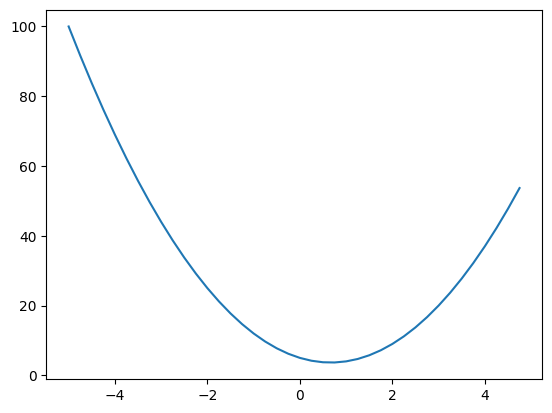

In [10]:
xs = np.arange(-5,5,.25)
ys = f(xs)
plt.plot(xs,ys)



define a small step size h to implement derivation by first principles

In [11]:
h = 0.000001
x = 2/3
(f(x+h)-f(x))/h

2.999378523327323e-06

In [12]:
a = 2.0
b = -3.0 
c = 10.0
d = a*b+c
print(d)

4.0


In [13]:
h = .0000001

a = 2.0
b = -3.0 
c = 10.0

d1 = a*b+c
b+=h
d2 = a*b+c
print('d1',d1)
print('d2',d2)
print('slope',(d2-d1)/h)


d1 4.0
d2 4.0000002
slope 1.9999999967268423


In [29]:
class Value:
    def __init__(self,data,_children=(),_op = '',label= ''):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label
    def __repr__(self):
        return f"Value(data={self.data})"
    def __add__(self,other):
        out = Value(self.data + other.data,(self,other),'+')
        return out
    def __mul__(self,other):
        out  = Value(self.data*  other.data,(self,other),'*')
        return out
    def __sub__(self,other):
        out = Value(self.data-other.data,(self,other),'-')
        return out

a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)
d = a*b +c
d

Value(data=4.0)

The below cell is just to visualise the connections made by the our class based on given expressions

In [30]:
from graphviz import Digraph
def trace(root):
    nodes,edges = set(),set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child,v))
                build(child)
    build(root)
    return nodes,edges

def draw_dot(root):
    dot = Digraph(format = 'svg',graph_attr={'rankdir':'LR'})
    nodes,edges  = trace(root)
    for n in nodes:
        uid = str(id(n))
        dot.node(name = uid, label = "{%s | data %.4f}" %(n.label,n.data,),shape = 'record')
        if n._op:
            dot.node(name = uid +n._op,label = n._op)
            dot.edge(uid+n._op,uid)
    for n1,n2 in edges:
        dot.edge(str(id(n1)),str(id(n2)) + n2._op)
    return dot

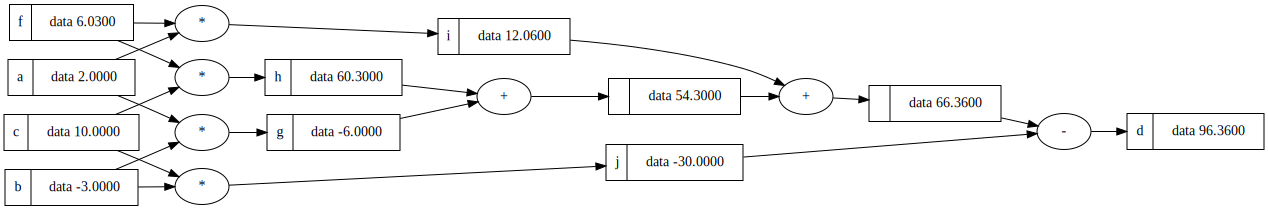

In [33]:
a = Value(2.0,label = 'a')
b = Value(-3.0,label = 'b')
c = Value(10.0,label = 'c')
f = Value(6.03,label = 'f')
g = a*b;g.label = 'g'
h = c*f;h.label = 'h'
i = f*a;i.label = 'i'
j = b*c;j.label = 'j'
d = g+h+i-j;d.label = 'd'
draw_dot(d)

Now we run backpropagation to calculate the gradient along all the values ( basically backward differentiation).
The derivative are what give us the weights for the networks. 
The modified block below just adds grad to our value class and also a visualisation of the gradient in the Graph form


In [36]:
from graphviz import Digraph

class Value:
    def __init__(self,data,_children=(),_op = '',label= ''):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self.label = label
    def __repr__(self):
        return f"Value(data={self.data})"
    def __add__(self,other):
        out = Value(self.data + other.data,(self,other),'+')
        return out
    def __mul__(self,other):
        out  = Value(self.data*  other.data,(self,other),'*')
        return out
    def __sub__(self,other):
        out = Value(self.data-other.data,(self,other),'-')
        return out


def trace(root):
    nodes,edges = set(),set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child,v))
                build(child)
    build(root)
    return nodes,edges

def draw_dot(root):
    dot = Digraph(format = 'svg',graph_attr={'rankdir':'LR'})
    nodes,edges  = trace(root)
    for n in nodes:
        uid = str(id(n))
        dot.node(name = uid, label = "{%s | data %.4f | grad %.4f}" %(n.label,n.data,n.grad),shape = 'record')
        if n._op:
            dot.node(name = uid +n._op,label = n._op)
            dot.edge(uid+n._op,uid)
    for n1,n2 in edges:
        dot.edge(str(id(n1)),str(id(n2)) + n2._op)
    return dot


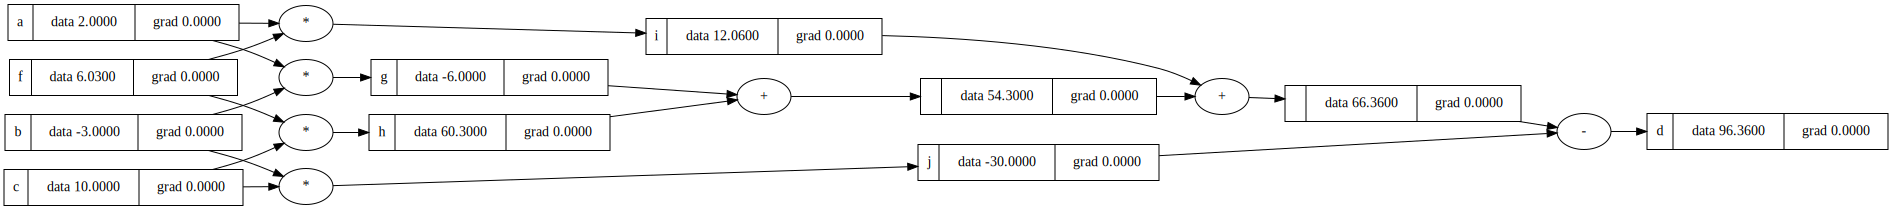

In [37]:
a = Value(2.0,label = 'a')
b = Value(-3.0,label = 'b')
c = Value(10.0,label = 'c')
f = Value(6.03,label = 'f')
g = a*b;g.label = 'g'
h = c*f;h.label = 'h'
i = f*a;i.label = 'i'
j = b*c;j.label = 'j'
d = g+h+i-j;d.label = 'd'
draw_dot(d)

Now we start by backprop. basically measuring how much d changes with every other input variable
In the following cell I basicvally do differentiation by using the forst principles. I simply add a delta to whichever variable i want to find out the derivative for. This method numerically approximates the derivative, which we can use to cross check with our algorithmic differentiation implementation of the backprob

In [ ]:
def lol(): 
    delta = .000001
    #f(x)
    a = Value(3.0,label = 'a')
    b = Value(-3.0,label = 'b')
    c = Value(10.0,label = 'c')
    f = Value(6.03,label = 'f')
    n = Value(0.7,label ='n')
    g = a*b;g.label = 'g'
    h = c*f;h.label = 'h'
    i = f*a;i.label = 'i'
    j = b*c;j.label = 'j'
    k = g+h;k.label = 'k'
    l = i-j;l.label = 'l'
    m = k+l;m.label = 'm'
    d = n*m;d.label = 'd'
    L1= d.data
#f(x+delta) in this just add delta to whichever variable the derivative must be found for.
    a = Value(3.0+delta,label = 'a') # to find the end derivative wrt a
    b = Value(-3.0,label = 'b')
    c = Value(10.0,label = 'c')
    f = Value(6.03,label = 'f')
    n = Value(0.7,label ='n')
    g = a*b;g.label = 'g'
    h = c*f;h.label = 'h'
    i = f*a;i.label = 'i'
    j = b*c;j.label = 'j'
    k = g+h;k.label = 'k' 
    l = i-j;l.label = 'l'
    m = k+l;m.label = 'm'
    d = n*m;d.label = 'd'
    L2= d.data
#slope  = [f(x+delta)-f(x)]/delta
    print((L2-L1)/delta)

lol()


    

6.320999972331265


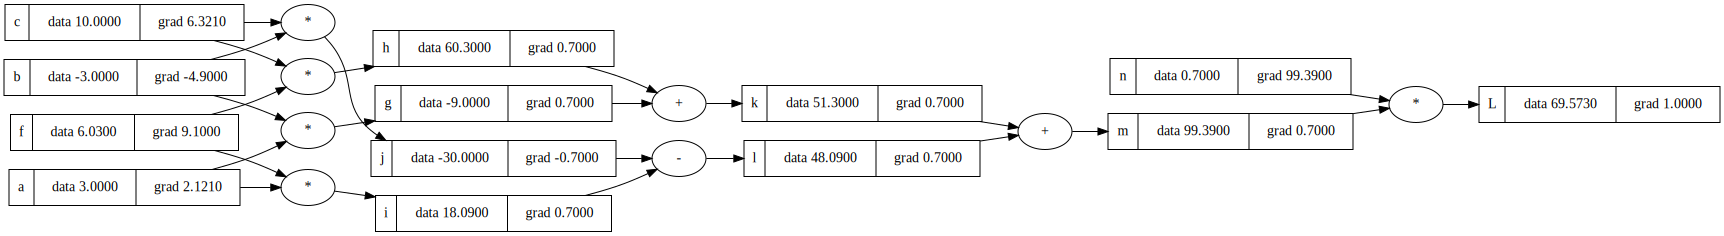

In [78]:
    a = Value(3.0,label = 'a')
    b = Value(-3.0,label = 'b')
    c = Value(10.0,label = 'c')
    f = Value(6.03,label = 'f')
    n = Value(0.7,label ='n')
    g = a*b;g.label = 'g'
    h = c*f;h.label = 'h'
    i = f*a;i.label = 'i'
    j = b*c;j.label = 'j'
    k = g+h;k.label = 'k'
    l = i-j;l.label = 'l'
    m = k+l;m.label = 'm'
    d = n*m;d.label = 'd'
    L = d;L.label = 'L'
    #manually perform one backward pass by explicitly stating the relation between each state based on the analytical differentiation 
    # L.grad = 1.0
    d.grad = 1.0 # gradient of endstage with itself
    m.grad += n.data*d.grad # applying chain rule for each stage i.e (dx/dy) = (dx/dc) .(dc/dy) in this case [d(L)/dm] = [d(d)/dm].[d(L)/d(d)]                   
    n.grad += m.data*d.grad
    l.grad += 1.0*m.grad #local derivative ( of m with respect to l)*derivative of L wrt m gives derivative of L wrt l
    k.grad += 1.0*m.grad
    h.grad += 1.0*k.grad
    g.grad += 1.0*k.grad
    i.grad += 1.0*l.grad
    j.grad += -1.0*l.grad
    f.grad += a.data*i.grad
    a.grad += f.data*i.grad
    f.grad += c.data*h.grad
    c.grad += f.data*h.grad
    a.grad += b.data*g.grad
    b.grad += a.data*g.grad
    c.grad += b.data*j.grad
    b.grad += c.data*j.grad


    

    draw_dot(L)

In case we want to maximise the rgadient of the final value, all we do is nudge the gradients of the variables we control to make a change in the final value. Basically we use gradient descent with a fixed scalar value 


In [ ]:
alpha = 0.001
#apply gradient descent ( forward pass)
a.data += alpha*a.grad   
b.data += alpha*b.grad
c.data += alpha*c.grad
f.data += alpha*f.grad
n.data += alpha*n.grad

g = a*b;g.label = 'g'
h = c*f;h.label = 'h'
i = f*a;i.label = 'i'
j = b*c;j.label = 'j'
k = g+h;k.label = 'k'
l = i-j;l.label = 'l'
m = k+l;m.label = 'm'
d = n*m;d.label = 'd'
L = d;L.label = 'L'

draw_dot(L)


Basically in this next cell i ran one forward pass, then backpropagated along with a forward pass for 10 iterations.

In [103]:
    
        a = Value(3.0,label = 'a')
        b = Value(-3.0,label = 'b')
        c = Value(10.0,label = 'c')
        f = Value(6.03,label = 'f')
        n = Value(-0.7,label ='n')
        g = a*b;g.label = 'g'
        h = c*f;h.label = 'h'
        i = f*a;i.label = 'i'
        j = b*c;j.label = 'j'
        k = g+h;k.label = 'k'
        l = i-j;l.label = 'l'
        m = k+l;m.label = 'm'
        d = n*m;d.label = 'd'
        L = d;L.label = 'L'
        for z in range (0,10): #run for 10 iterations
            #manually perform one backward pass by explicitly stating the relation between each state based on the analytical differentiation 
            L.grad += 1.0
            d.grad =+ 1.0 # gradient of endstage with itself
            m.grad += n.data*d.grad # applying chain rule for each stage i.e (dx/dy) = (dx/dc) .(dc/dy) in this case [d(L)/dm] = [d(d)/dm].[d(L)/d(d)]                   
            n.grad += m.data*d.grad
            l.grad += 1.0*m.grad #local derivative ( of m with respect to l)*derivative of L wrt m gives derivative of L wrt l
            k.grad += 1.0*m.grad
            h.grad += 1.0*k.grad
            g.grad += 1.0*k.grad
            i.grad += 1.0*l.grad
            j.grad += -1.0*l.grad
            f.grad += a.data*i.grad
            a.grad += f.data*i.grad
            f.grad += c.data*h.grad
            c.grad += f.data*h.grad
            a.grad += b.data*g.grad
            b.grad += a.data*g.grad
            c.grad += b.data*j.grad
            b.grad += c.data*j.grad

            alpha = 0.0001
            #apply gradient descent ( for forward pass)
            a.data -= alpha*a.grad   
            b.data -= alpha*b.grad
            c.data -= alpha*c.grad
            f.data -= alpha*f.grad
            n.data -= alpha*n.grad
            #forward pass
            g = a*b;g.label = 'g'
            h = c*f;h.label = 'h'
            i = f*a;i.label = 'i'
            j = b*c;j.label = 'j'
            k = g+h;k.label = 'k'
            l = i-j;l.label = 'l'
            m = k+l;m.label = 'm'
            d = n*m;d.label = 'd'
            L = d;L.label = 'L'


            print( L.label,L.data,L.grad) 



    

L -70.57618005671414 0.0
L -72.5842735920787 0.0
L -75.60079873947338 0.0
L -79.6311612047816 0.0
L -84.68280927565503 0.0
L -90.76544187550998 0.0
L -97.89127091697233 0.0
L -106.07533961953568 0.0
L -115.33589893237234 0.0
L -125.6948447607864 0.0


Onto using this concept in neurons. We define the tanh function


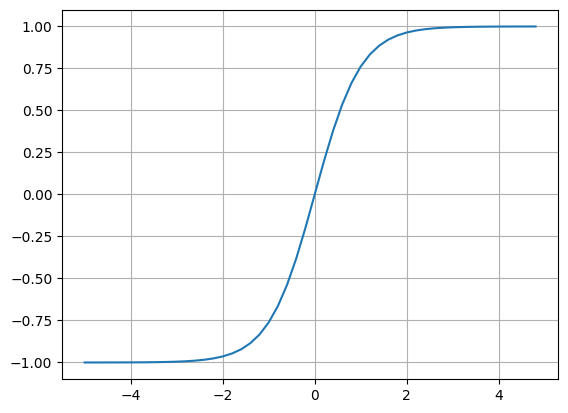

In [104]:
plt.plot(np.arange(-5,5,.2),np.tanh(np.arange(-5,5,.2)));plt.grid();

Now onto creating a basic neuron, we use one with a 2 variable input and weights to show the basic working of it

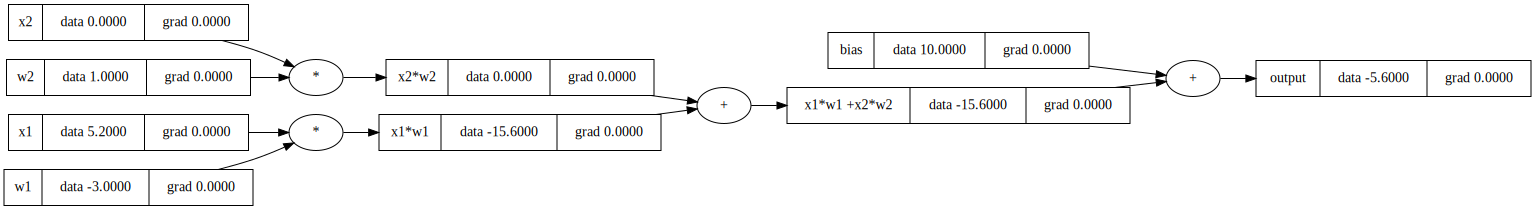

In [105]:
#input x1,x2
x1 = Value(5.2,label = 'x1')
x2 = Value(0.0,label = 'x2')

#weight initialisation w1,w2
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0,label = 'w2')

#bias of the neuron
b = Value(10,label = 'bias')

# x1w1 +x2w2+b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1+x2w2 ;x1w1x2w2.label = 'x1*w1 +x2*w2'
r = x1w1x2w2 + b; r.label = 'output'
draw_dot(r)

With the creation of this neuron, we are now faced with the challenge of normalising it, using a tanh function. We make the changes to the Value class 

In [ ]:
class Value:
    def __init__(self,data,_children=(),_op = '',label= ''):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label
    def __repr__(self):
        return f"Value(data={self.data})"
    def __add__(self,other):
        out = Value(self.data + other.data,(self,other),'+')
        return out
    def __mul__(self,other):
        out  = Value(self.data*  other.data,(self,other),'*')
        return out
    def __sub__(self,other):
        out = Value(self.data-other.data,(self,other),'-')
        return out

a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)
d = a*b +c
d